<h1 style="background:#6A9662; color:#FFF; padding:5px;">Business Analytics with Python</h1>

# <font color='#6A9662'>Financial Analytics</font>

## Simulações de Monte Carlo

### Estudo Dirigido - Simulação de Monte Carlo e séries temporais para modelagem financeira
> Pfizer Inc. (PFE)
[Dataset](https://finance.yahoo.com/quote/PFE/history?period1=1451692800&period2=1609545600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.4


<h2 style="background:#6A9662; color:#FFF; padding:5px;">0. Carregando os pacotes</h2>

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para cálculos estatísticos
import scipy
from scipy.stats import kurtosis, skew, shapiro

In [3]:
# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Wecchi Data Science" --iversions

Author: Wecchi Data Science

matplotlib: 3.2.1
pandas    : 1.0.4
scipy     : 1.3.1
numpy     : 1.18.5
seaborn   : 0.9.0



<h2 style="background:#6A9662; color:#FFF; padding:5px;">1. Carregando os dados</h2>

In [5]:
# Carrega o dataset
empresa = "Pfizer Inc. (PFE)"
arquivo = "dados/PFE2016_2020.csv"
dados = pd.read_csv(arquivo, parse_dates = True, index_col = "Date")

In [6]:
# Visualizando registros
# Cada coluna representa o valor da ação em cada dia da série.
# valor de abertura, fechamento, máximo, mínimo e volume. 
# A coluna Mudanca(%) representa a variação diária.
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,30.218216,30.388994,29.952562,30.313093,25.135386,39322400
2016-01-05,30.531309,30.588236,30.294117,30.531309,25.316326,28778000
2016-01-06,30.104364,30.265656,29.810247,29.990513,24.867903,27242300
2016-01-07,29.563568,30.180265,29.544592,29.791271,24.702692,39223100
2016-01-08,29.933586,30.009487,29.335863,29.411764,24.388004,34840300


In [7]:
# Tipos de Dados
dados.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Shape
dados.shape

(1259, 6)

In [9]:
# Sumário estatístico
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,34.707469,34.990736,34.400551,34.696873,31.758269,2.701955e+07
std,3.615396,3.647018,3.574617,3.611037,4.395680,1.661475e+07
min,27.011385,27.495256,26.451612,27.030361,22.694323,5.187700e+06
25%,32.049335,32.248577,31.783681,32.020874,28.001064,1.818090e+07
50%,34.307400,34.535103,34.051235,34.316887,31.346630,2.308400e+07
75%,36.755218,37.082544,36.323530,36.698292,35.615170,3.071430e+07
max,43.994308,44.089184,43.415562,43.861481,42.560001,2.998294e+08


<h2 style="background:#6A9662; color:#FFF; padding:5px;">2. Visualizando o preço diário de fechamento das Ações no tempo</h2> 

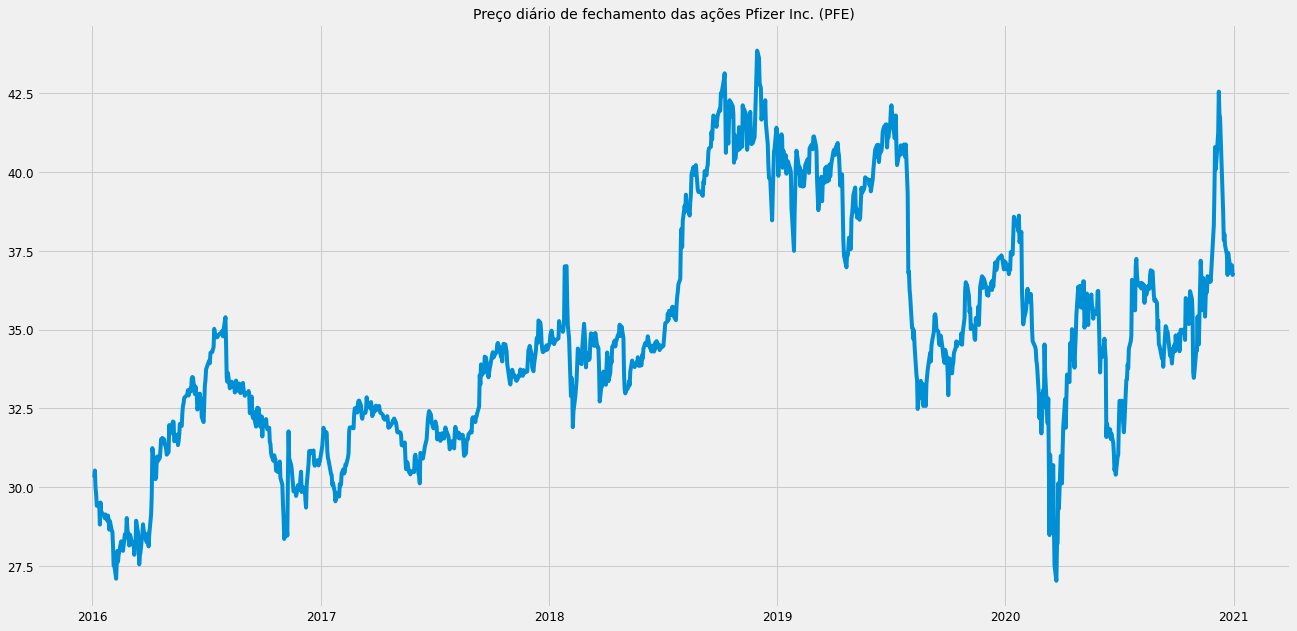

In [10]:
# Plot
plt.plot(dados["Close"])
plt.title("Preço diário de fechamento das ações {}".format(empresa), size = 14)
plt.show()

<h2 style="background:#6A9662; color:#FFF; padding:5px;">3. Cálculo do retorno diário</h2> 

In [11]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
retorno_diario = dados["Close"].pct_change().dropna()
retorno_diario.head()

Date
2016-01-05    0.007199
2016-01-06   -0.017713
2016-01-07   -0.006644
2016-01-08   -0.012739
2016-01-11    0.002258
Name: Close, dtype: float64

Vamos calcular o retorno acumulado da série.

In [12]:
# Retorno acumulado
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

0.4469483862963064

<h2 style="background:#6A9662; color:#FFF; padding:5px;">4. Análise exploratória e análise descritiva</h2> 

Vamos usar a estatística para calcular o retorno médio e a variação (desvio padrão).

In [13]:
# Média do fechamento diário da cotação das ações
media_retorno_diario = np.mean(retorno_diario)

In [14]:
# Desvio padrão do fechamento diário da cotação das ações
desvio_retorno_diario = np.std(retorno_diario)

In [15]:
# Média e desvio padrão
print("Média do retorno no fechamento:", media_retorno_diario)
print("Desvio padrão do retorno no fechamento:", desvio_retorno_diario)

Média do retorno no fechamento: 0.00025487456748514794
Desvio padrão do retorno no fechamento: 0.014175003371733007


Vamos considerar o ano com 252 dias de funcionamento da bolsa americana.

In [16]:
# Média e desvio padrão no ano (considerando 252 dias úteis de operações na bolsa americana)
print("Retorno médio anualizado de fechamento:", (1 + media_retorno_diario) ** 252 - 1)
print("Desvio padrão anualizado de fechamento:", desvio_retorno_diario*np.sqrt(252))

Retorno médio anualizado de fechamento: 0.06632718594556475
Desvio padrão anualizado de fechamento: 0.2250212025306456


Embora nos últimos anos a performance das ações tenha sido boa, na média o ganho tem sido baixo, embora positivo. No longo prazo o investidor não perdeu dinheiro. Vamos criar um plot com o Retorno Diário.

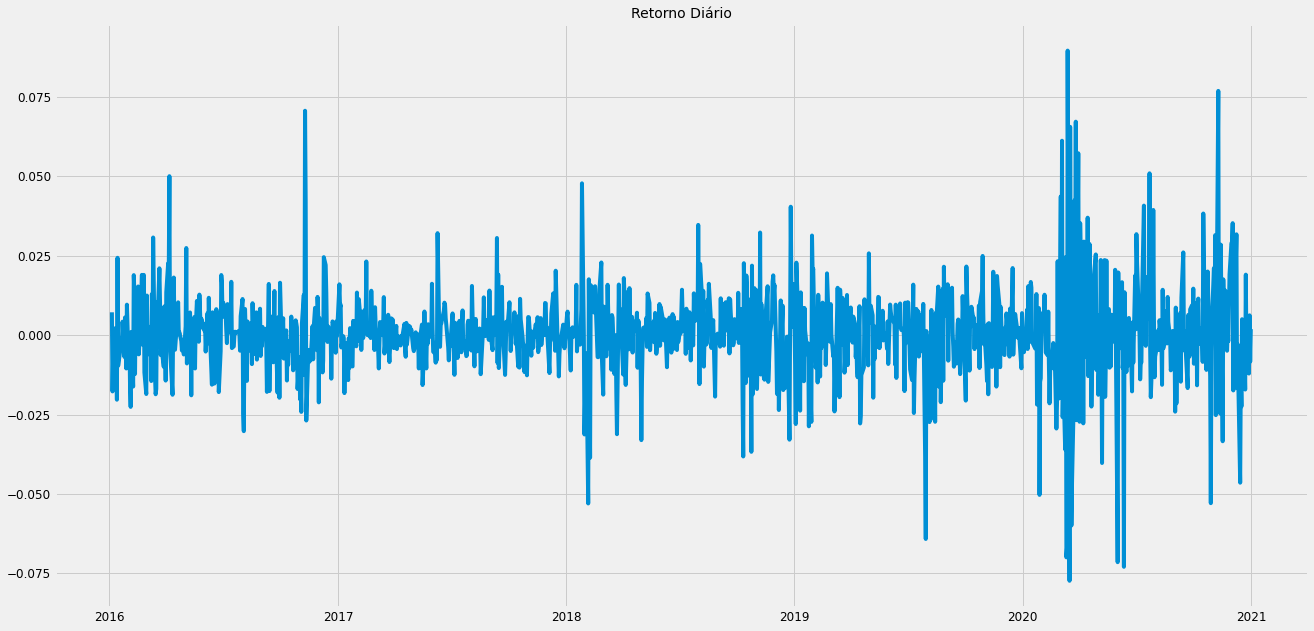

In [17]:
# Plot
plt.plot(retorno_diario)
plt.title("Retorno Diário", size = 14)
plt.show()

Com apenas duas grandes variações, o retorno diário tem sido constante ao longo do tempo. Vamos criar um histograma com a dstribuição do retorno diário.

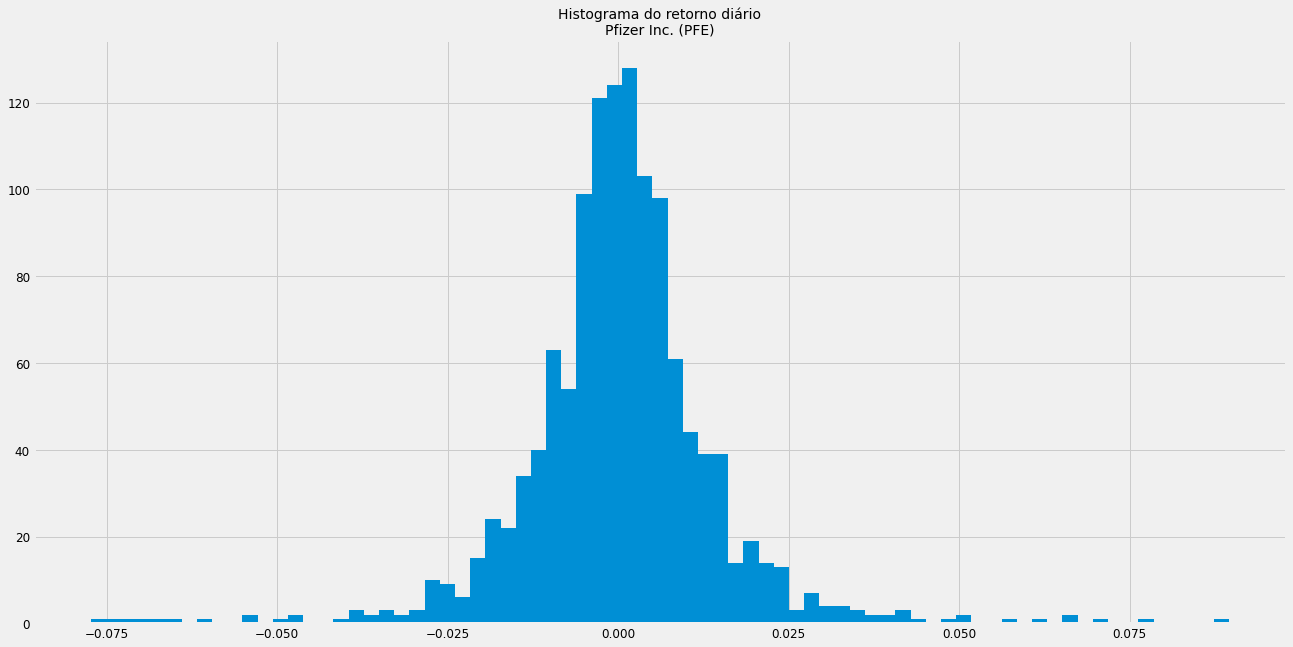

In [18]:
# Plot
plt.hist(retorno_diario, bins = 75)
plt.title("Histograma do retorno diário\n{}".format(empresa), size = 14)
plt.show()

Os valores estão bem próximos mesmo da média. Mas vamos confirmar isso calculando curtose e assimetria.

In [19]:
# Calculando curtose e assimetria
print("Curtose:", kurtosis(retorno_diario))
print("Assimetria:", skew(retorno_diario))

Curtose: 6.804471955773026
Assimetria: 0.03672411532665652


A curtose indica que os registros estão bem próximos da média. Mas a assimetria indica que os dados estão bem distorcidos e distantes de uma distribuição normal. Vamos aplicar o teste de normalidade na série.

<h3 style="background:#6A9662; color:#FFF; padding:5px;">Teste de Normalidade Shapiro-Wilk</h3>   

In [20]:
# Executa o teste de normalidade para a série
teste_normalidade = shapiro(retorno_diario)[1]

# Verifica o retorno com base no valor-p de 0.05
if teste_normalidade <= 0.05:
    print("Rejeitamos a Hipótese Nula de Normalidade dos Dados.")
else:
    print("Falhamos em Rejeitar a Hipótese Nula de Normalidade dos Dados.")

Rejeitamos a Hipótese Nula de Normalidade dos Dados.


Como imaginávamos a distribuição não é normal. Vamos aplicar uma transformação de log à série e então aplicar a técnica de diferenciação para retirar da série os padrões de tendência e deixarmos apenas os dados reais, que nos interessam. Com isso calculamos o retorno diário.

In [21]:
# Transformação de log e diferenciação para cálculo do retorno diário
log_retorno_diario = (np.log(dados["Close"]) - np.log(dados["Close"]).shift(-1)).dropna()

# Calculamos média e desvio padrão após a transformação
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

Vamos criar um plot com o retorno diário da série transformada.

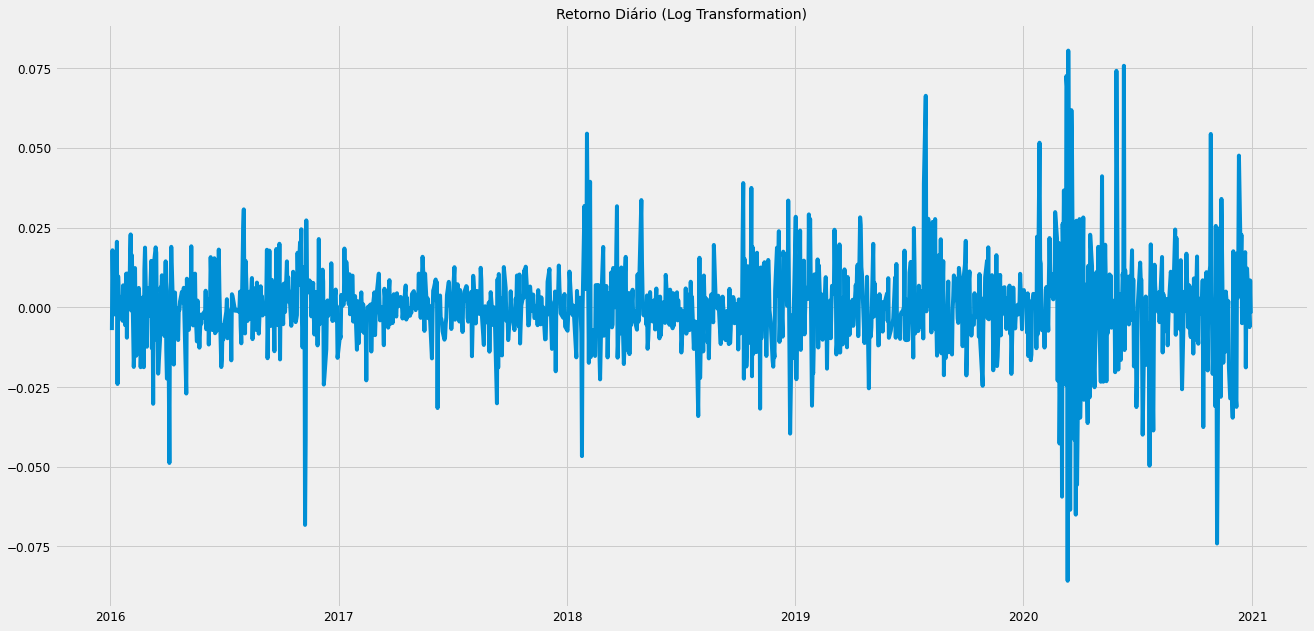

In [22]:
# Plot
plt.plot(log_retorno_diario)
plt.title("Retorno Diário (Log Transformation)", size = 14)
plt.show()

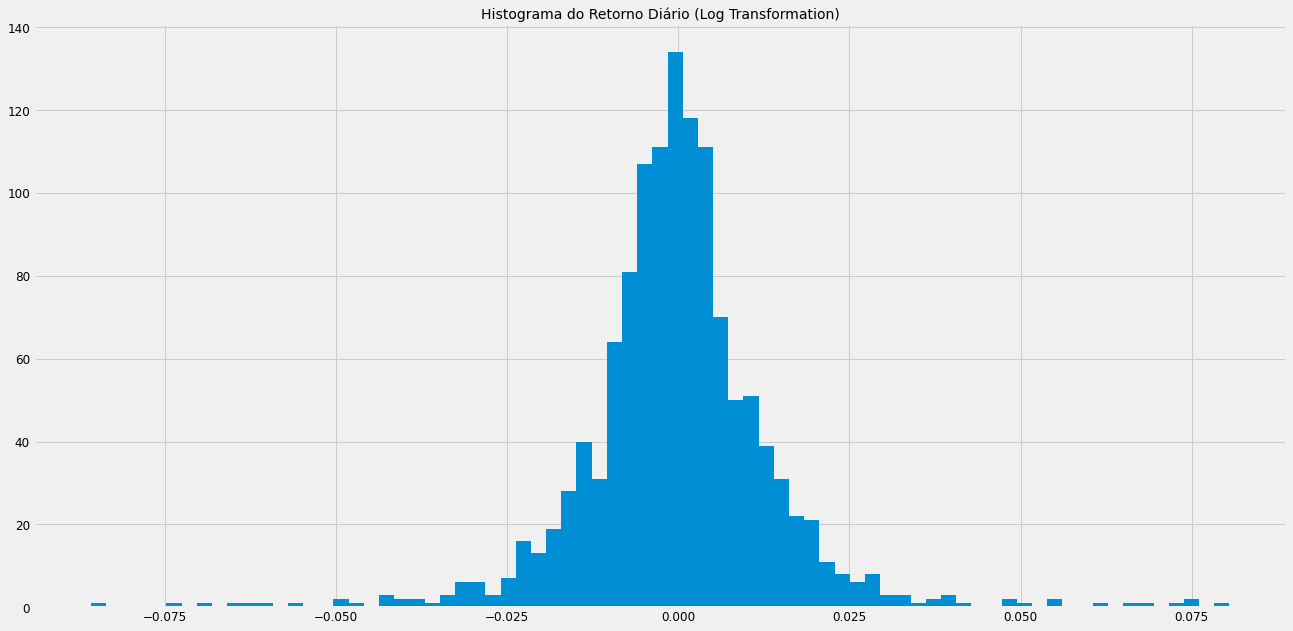

In [23]:
# Plot
plt.hist(log_retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário (Log Transformation)", size = 14)
plt.show()

In [24]:
# Calculando curtose e assimetria
print("Curtose:", kurtosis(log_retorno_diario))
print("Assimetria:", skew(log_retorno_diario))

Curtose: 6.814734013608964
Assimetria: 0.1502400530641531


In [25]:
# Executa o teste de normalidade para a série
teste_normalidade = shapiro(log_retorno_diario)[1]

# Verifica o retorno com base no valor-p de 0.05
if teste_normalidade <= 0.05:
    print("Rejeitamos a Hipótese Nula de Normalidade dos Dados.")
else:
    print("Falhamos em Rejeitar a Hipótese Nula de Normalidade dos Dados.")

Rejeitamos a Hipótese Nula de Normalidade dos Dados.


Os dados ainda não são normais, porém reduzimos a distorção dos dados. Poderíamos aplicar outras transformações, mas para o objetivo este estudo isso é suficiente. Seguimos com a série transformada.

In [26]:
shapiro(log_retorno_diario)

(0.9064054489135742, 4.32277402689445e-27)

<h2 style="background:#6A9662; color:#FFF; padding:5px;">5. Valor histórico</h2> 

Vamos calcular o valor histórico do preço da ação.

In [27]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.")
print("VaR {}%:".format(var_level), var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VaR 95%: -0.020845751774208665


In [28]:
# Var para os próximos 5 dias
var * np.sqrt(5)

-0.046612518009217424

<h3 style="background:#6A9662; color:#FFF; padding:5px;">Valor Histórico Condicional</h3>  

In [29]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos piores {}% dos casos, as perdas foram, em média, superiores ao percentual histórico.".format(100-var_level))
print("CVaR {}%:".format(var_level), cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVaR 95%: -0.033401369339756876


<h3 style="background:#6A9662; color:#FFF; padding:5px;">Monte Carlo simulation</h3>   

In [31]:
dados["Close"].tail(1)

Date
2020-12-31    36.810001
Name: Close, dtype: float64

In [35]:
# Último valor da ação
ultimo_preco = dados["Close"].tail(1)[0]

In [41]:
# Simulação de Monte Carlo

# Número de dias a frente
dias_posteriores = 252

# Número de simulações
simulacoes = 2500

# Cria um array vazio com as dimensões 
results = np.empty((simulacoes, dias_posteriores))

# Loop por cada simulação
for s in range(simulacoes):
    
    # Calcula o retorno com dados randômicos seguindo uma distribuição normal
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario, 
                                          scale = log_desvio_retorno_diario, 
                                          size = dias_posteriores)
    
    result = ultimo_preco * (random_returns.cumprod())
    
    results[s, :] = result

In [42]:
# Definindo o índice da série simulada
index = pd.date_range("2021-01-01", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

<h3 style="background:#6A9662; color:#FFF; padding:5px;">Resultado da Simulação de Monte Carlo</h3>    

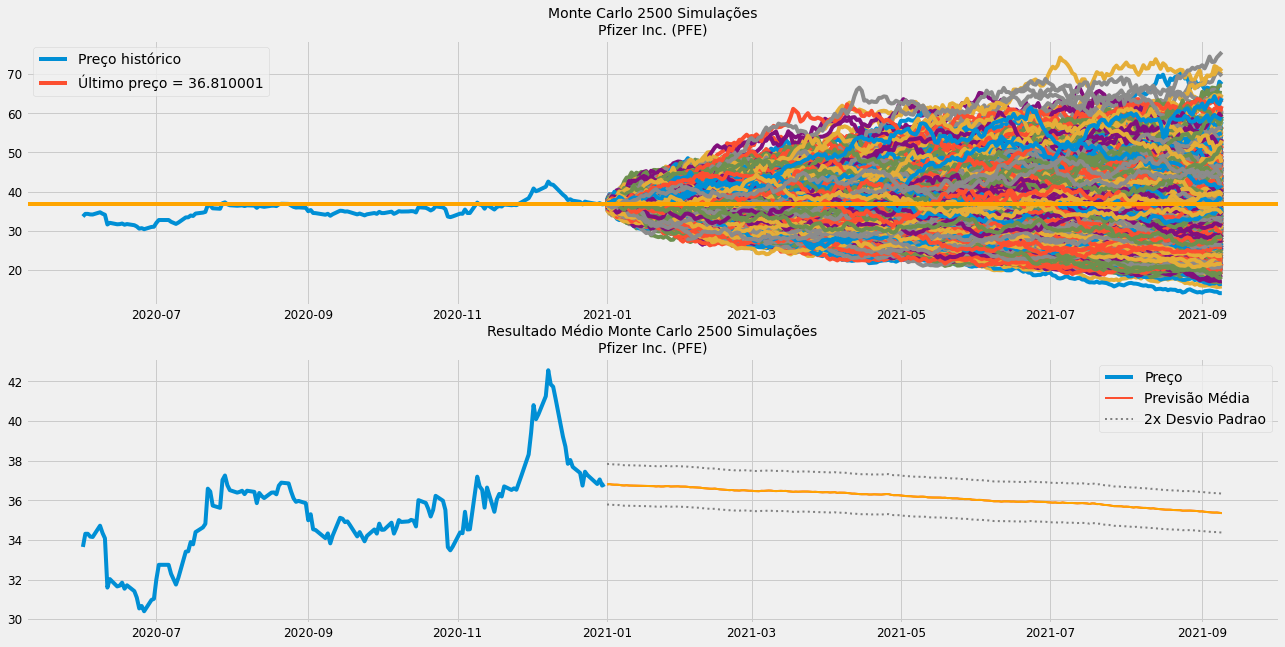

In [43]:
# Dividindo a área de plotagem em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados["Close"]["2020-06-01":])

ax[0].plot(resultados)

ax[0].axhline(ultimo_preco, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações\n{empresa}", size = 14)

ax[0].legend(["Preço histórico", "Último preço = {}".format(ultimo_preco)])

ax[1].plot(dados["Close"]["2020-06-01":])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado Médio Monte Carlo {simulacoes} Simulações\n{empresa}", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()

A previsão é negativa com os dados simulados e no longo prazo as ações da **Pfizer** tendem a desvalorizar.